In [1]:

# 1. Dependent variable  is binary (1 for BadBuy, 0 for good)
# 2. 29 independent variables of categorical, numerical, and data types(except Purchase and IsBayBuy column)
# 3. missing values in many columns

In [100]:

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Task 1. Data Selection and Distribution

In [101]:
# Importing the CaseStudy1 dataset
df = pd.read_csv('CaseStudyData.csv')

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
#show all columns information
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
PurchaseID                           41476 non-null int64
PurchaseTimestamp                    41476 non-null int64
PurchaseDate                         41476 non-null object
Auction                              41432 non-null object
VehYear                              41432 non-null float64
Make                                 41432 non-null object
Color                                41432 non-null object
Transmission                         41432 non-null object
WheelTypeID                          41432 non-null object
WheelType                            41380 non-null object
VehOdo                               41432 non-null float64
Nationality                          41432 non-null object
Size                                 41432 non-null object
TopThreeAmericanName                 41432 non-null object
MMRAcquisitionAuctionAveragePrice    41416 non-null object
MMRAcq

,PurchaseID,PurchaseTimestamp,PurchaseDate,Auction,VehYear,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRCurrentRetailCleanPrice,MMRCurrentRetailRatio,PRIMEUNIT,AUCGUART,VNST,VehBCost,IsOnlineSale,WarrantyCost,ForSale,IsBadBuy
0,0,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,...,12505,0.941783287,?,?,NC,7800,0,920.0,Yes,0
1,1,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,...,10571,0.922618485,?,?,NC,7800,0,834.0,Yes,0
2,2,1253232000,18/09/2009 10:00,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,...,9932,0.935159082,?,?,NC,7800,0,834.0,Yes,0
3,3,1253232000,18/09/2009 10:00,OTHER,2008.0,CHEVROLET,RED,AUTO,2,Covers,...,8739,0.931456688,?,?,NC,6000,0,671.0,Yes,0
4,4,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,SILVER,AUTO,2,Covers,...,9908,0.906943884,?,?,NC,7800,0,920.0,Yes,0


1. What is the proportion of cars who can be classified as a “kick”? 


In [103]:
ProportionOfKicks = len(df[df['IsBadBuy'] == 1])/len(df['IsBadBuy'])
print(ProportionOfKicks)

0.1294965763333012


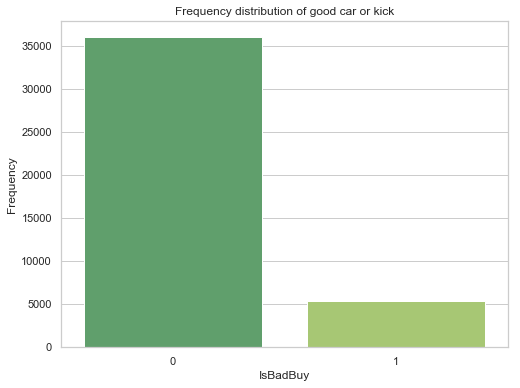

In [104]:
import seaborn as sns
# visualization of the porportion of target variable
sns.set(style="whitegrid", color_codes=True)

plt.figure(figsize=(8,6))
ax = sns.countplot(x="IsBadBuy", data= df,palette="summer")
plt.ylabel('Frequency')
plt.xlabel('IsBadBuy')
plt.title('Frequency distribution of good car or kick')
plt.show()

ProportionOfKicks = len(df[df['IsBadBuy'] == 1])/len(df['IsBadBuy'])

In [105]:
#2. Exploring data-describe key statistic
print(df['PurchaseID'].describe())
print(df['PurchaseTimestamp'].describe())
print(df['PurchaseDate'].describe())
print(df['Auction'].describe())
print(df['VehYear'].describe())
print(df['Make'].describe())
print(df['Color'].describe())
print(df['Transmission'].describe())
print(df['WheelTypeID'].describe())
print(df['WheelType'].describe())
print(df['VehOdo'].describe())
print(df['TopThreeAmericanName'].describe())
print(df['Nationality'].describe())
print(df['Size'].describe())
print(df['MMRAcquisitionAuctionAveragePrice'].describe())
print(df['MMRAcquisitionAuctionCleanPrice'].describe())
print(df['MMRAcquisitionRetailAveragePrice'].describe())
print(df['MMRAcquisitonRetailCleanPrice'].describe())
print(df['MMRCurrentAuctionAveragePrice'].describe())
print(df['MMRCurrentAuctionCleanPrice'].describe())
print(df['MMRCurrentRetailAveragePrice'].describe())
print(df['MMRCurrentRetailCleanPrice'].describe())
print(df['MMRCurrentRetailRatio'].describe())
print(df['PRIMEUNIT'].describe())
print(df['AUCGUART'].describe())
print(df['VNST'].describe())
print(df['VehBCost'].describe())
print(df['IsOnlineSale'].describe())
print(df['WarrantyCost'].describe())
print(df['ForSale'].describe())
print(df['IsBadBuy'].describe())


count    41476.000000
mean     20737.500000
std      11973.234219
min          0.000000
25%      10368.750000
50%      20737.500000
75%      31106.250000
max      41475.000000
Name: PurchaseID, dtype: float64
count    4.147600e+04
mean     1.262260e+09
std      1.796895e+07
min      1.231114e+09
25%      1.247530e+09
50%      1.262045e+09
75%      1.277770e+09
max      1.293667e+09
Name: PurchaseTimestamp, dtype: float64
count                41476
unique                 497
top       12/02/2009 10:00
freq                   242
Name: PurchaseDate, dtype: object
count       41432
unique          3
top       MANHEIM
freq        22168
Name: Auction, dtype: object
count    41432.000000
mean      2005.360615
std          1.730587
min       2001.000000
25%       2004.000000
50%       2005.000000
75%       2007.000000
max       2010.000000
Name: VehYear, dtype: float64
count         41432
unique           30
top       CHEVROLET
freq           9548
Name: Make, dtype: object
count      41432
uni

In [106]:
# unique values
print(df['PurchaseID'].unique())
print(df['PurchaseTimestamp'].unique())
print(df['PurchaseDate'].unique())
print(df['Auction'].unique())
print(df['VehYear'].unique())
print(df['Make'].unique())
print(df['Color'].unique())
print(df['Transmission'].unique())
print(df['WheelTypeID'].unique())
print(df['WheelType'].unique())
print(df['VehOdo'].unique())
print(df['TopThreeAmericanName'].unique())
print(df['Nationality'].unique())
print(df['Size'].unique())
print(df['MMRAcquisitionAuctionAveragePrice'].unique())
print(df['MMRAcquisitionAuctionCleanPrice'].unique())
print(df['MMRAcquisitionRetailAveragePrice'].unique())
print(df['MMRAcquisitonRetailCleanPrice'].unique())
print(df['MMRCurrentAuctionAveragePrice'].unique())
print(df['MMRCurrentAuctionCleanPrice'].unique())
print(df['MMRCurrentRetailAveragePrice'].unique())
print(df['MMRCurrentRetailCleanPrice'].unique())
print(df['MMRCurrentRetailRatio'].unique())
print(df['PRIMEUNIT'].unique())
print(df['AUCGUART'].unique())
print(df['VNST'].unique())
print(df['VehBCost'].unique())
print(df['IsOnlineSale'].unique())
print(df['WarrantyCost'].unique())
print(df['ForSale'].unique())
print(df['IsBadBuy'].unique())

[    0     1     2 ... 41473 41474 41475]
[1253232000 1254182400 1254700800 1254873600 1254960000 1255305600
 1255392000 1255478400 1255910400 1255996800 1256515200 1259020800
 1259107200 1259539200 1259884800 1260144000 1260489600 1260748800
 1260835200 1260921600 1261008000 1261094400 1261353600 1262131200
 1262563200 1263340800 1274745600 1243296000 1251072000 1271203200
 1271808000 1272412800 1273017600 1274227200 1275436800 1276041600
 1276732800 1277251200 1278547200 1279065600 1279670400 1280275200
 1280880000 1284508800 1285113600 1285718400 1286323200 1286928000
 1287532800 1288137600 1288742400 1289347200 1289952000 1291161600
 1236902400 1242345600 1245369600 1245974400 1248393600 1249603200
 1250208000 1252022400 1252627200 1255651200 1257465600 1258675200
 1265328000 1265932800 1266537600 1267142400 1267747200 1268352000
 1268956800 1269561600 1270166400 1271376000 1271980800 1272585600
 1273190400 1273795200 1274400000 1275609600 1276214400 1276819200
 1277856000 12780288

In [107]:
#print number of occurences for each unique value 
print(df['PurchaseID'].value_counts())
print(df['PurchaseTimestamp'].value_counts())
print(df['PurchaseDate'].value_counts())
print(df['Auction'].value_counts())
print(df['VehYear'].value_counts())
print(df['Make'].value_counts())
print(df['Color'].value_counts())
print(df['Transmission'].value_counts())
print(df['WheelTypeID'].value_counts())
print(df['WheelType'].value_counts())
print(df['VehOdo'].value_counts())
print(df['TopThreeAmericanName'].value_counts())
print(df['Nationality'].value_counts())
print(df['Size'].value_counts())
print(df['MMRAcquisitionAuctionAveragePrice'].value_counts())
print(df['MMRAcquisitionAuctionCleanPrice'].value_counts())
print(df['MMRAcquisitionRetailAveragePrice'].value_counts())
print(df['MMRAcquisitonRetailCleanPrice'].value_counts())
print(df['MMRCurrentAuctionAveragePrice'].value_counts())
print(df['MMRCurrentAuctionCleanPrice'].value_counts())
print(df['MMRCurrentRetailAveragePrice'].value_counts())
print(df['MMRCurrentRetailCleanPrice'].value_counts())
print(df['MMRCurrentRetailRatio'].value_counts())
print(df['PRIMEUNIT'].value_counts())
print(df['AUCGUART'].value_counts())
print(df['VNST'].value_counts())
print(df['VehBCost'].value_counts())
print(df['IsOnlineSale'].value_counts())
print(df['WarrantyCost'].value_counts())
print(df['ForSale'].value_counts())
print(df['IsBadBuy'].value_counts())


2047     1
11567    1
15693    1
13644    1
3403     1
1354     1
7497     1
5448     1
27975    1
25926    1
32069    1
30020    1
19779    1
17730    1
23873    1
21824    1
36155    1
34106    1
40249    1
9550     1
11599    1
38232    1
25958    1
15725    1
13676    1
3435     1
1386     1
7529     1
5480     1
28007    1
        ..
21119    1
661      1
23166    1
17021    1
19068    1
29307    1
31354    1
25209    1
27256    1
2708     1
6806     1
2740     1
35492    1
12979    1
15026    1
8881     1
10928    1
37543    1
39590    1
33445    1
21151    1
4759     1
23198    1
17053    1
19100    1
29339    1
31386    1
25241    1
27288    1
0        1
Name: PurchaseID, Length: 41476, dtype: int64
1235520000    242
1259020800    242
1234396800    242
1264032000    237
1287014400    234
1248825600    216
1287532800    210
1285804800    209
1234915200    208
1261008000    208
1286928000    204
1266451200    202
1264550400    201
1285200000    196
1236729600    193
1233792000   

0        501
7478     207
8546      94
11562     80
10103     69
7611      67
9643      64
6944      58
10268     57
9256      55
8964      55
12239     52
11443     49
11447     47
5666      46
7529      45
11599     44
11513     43
8271      43
10748     42
9303      41
5377      40
7974      40
11054     40
10315     39
10269     39
12565     39
7234      39
12224     38
9613      38
        ... 
4072       1
11092      1
14572      1
5637       1
18741      1
6092       1
9097       1
3325       1
13196      1
18443      1
17431      1
16688      1
13517      1
2859       1
16097      1
15614      1
11466      1
13446      1
14106      1
6013       1
4487       1
9201       1
14781      1
16141      1
10014      1
16782      1
3619       1
14437      1
12222      1
16996      1
Name: MMRAcquisitonRetailCleanPrice, Length: 11583, dtype: int64
0        287
?        184
5480     160
6311      78
7269      75
8186      71
8033      66
7644      65
5569      59
6966      54
6858      51

In [108]:
x = df.iloc[:, :-1]
y = df.iloc[:, 30]
x

,PurchaseID,PurchaseTimestamp,PurchaseDate,Auction,VehYear,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,MMRCurrentRetailRatio,PRIMEUNIT,AUCGUART,VNST,VehBCost,IsOnlineSale,WarrantyCost,ForSale
0,0,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,...,11777,12505,0.941783287,?,?,NC,7800,0,920.0,Yes
1,1,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,...,9753,10571,0.922618485,?,?,NC,7800,0,834.0,Yes
2,2,1253232000,18/09/2009 10:00,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,...,9288,9932,0.935159082,?,?,NC,7800,0,834.0,Yes
3,3,1253232000,18/09/2009 10:00,OTHER,2008.0,CHEVROLET,RED,AUTO,2,Covers,...,8140,8739,0.931456688,?,?,NC,6000,0,671.0,Yes
4,4,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,SILVER,AUTO,2,Covers,...,8986,9908,0.906943884,?,?,NC,7800,0,920.0,Yes
5,5,1253232000,18/09/2009 10:00,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,...,9150,9712,0.942133443,?,?,NC,7800,0,834.0,Yes
6,6,1253232000,18/09/2009 10:00,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,...,9150,9712,0.942133443,?,?,NC,7800,0,834.0,Yes
7,7,1253232000,18/09/2009 10:00,OTHER,2008.0,PONTIAC,WHITE,AUTO,2,Covers,...,11938,13074,0.913109989,?,?,NC,7500,0,671.0,Yes
8,8,1253232000,18/09/2009 10:00,OTHER,2008.0,PONTIAC,BLUE,AUTO,2,Covers,...,12857,14135,0.909586134,?,?,NC,7800,0,1500.0,Yes
9,9,1253232000,18/09/2009 10:00,OTHER,2008.0,CHRYSLER,BEIGE,AUTO,2,Covers,...,9150,9712,0.942133443,?,?,NC,7800,0,834.0,Yes


In [109]:
x.shape

(41476, 30)

In [110]:
y.shape

(41476,)

---

In [111]:
# Step 2: Data preprocessing

2. Did you have to fix any data quality problems? Detail them.

There are missing values in most columns. Show NaN in columns with misiing value "?" and "0".Imputing missing values in categorical features with mode and in numerical features with mean.

Drop PRIMEUNIT, AUCGUART,as more than 95% statistics are null.

Change incorrect value of IsOnlineSale into either 1 or 0.

Change "YES" and "yes" of ForSale to "Yes".  

The target variable "IsBadBuy" is imbalanced. 




In [112]:
a_x = x.replace({'Color':'?', 'Transmission':'?', 'WheelType':'?', 'TopThreeAmericanName':'?', 'Nationality':'?', 'Size':'?', 'MMRCurrentRetailRatio':'#VALUE!', 'PRIMEUNIT':'?', 'AUCGUART':'?', 'IsOnlineSale':['?'], 'MMRAcquisitionAuctionAveragePrice':'0', 'MMRAcquisitionAuctionCleanPrice':'0', 'MMRAcquisitionRetailAveragePrice':'0', 'MMRAcquisitonRetailCleanPrice':'0', 
                  'WheelTypeID':['?','0'], 'MMRCurrentAuctionAveragePrice':['?','0'], 'MMRCurrentAuctionCleanPrice':['?','0'], 'MMRCurrentRetailAveragePrice':['?','0'], 'MMRCurrentRetailCleanPrice':['?','0'], 'ForSale':['?','0']},np.NaN) 

a_x



,PurchaseID,PurchaseTimestamp,PurchaseDate,Auction,VehYear,Make,Color,Transmission,WheelTypeID,WheelType,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,MMRCurrentRetailRatio,PRIMEUNIT,AUCGUART,VNST,VehBCost,IsOnlineSale,WarrantyCost,ForSale
0,0,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,...,11777,12505,0.941783287,NaN,NaN,NC,7800,0,920.0,Yes
1,1,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,...,9753,10571,0.922618485,NaN,NaN,NC,7800,0,834.0,Yes
2,2,1253232000,18/09/2009 10:00,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,...,9288,9932,0.935159082,NaN,NaN,NC,7800,0,834.0,Yes
3,3,1253232000,18/09/2009 10:00,OTHER,2008.0,CHEVROLET,RED,AUTO,2,Covers,...,8140,8739,0.931456688,NaN,NaN,NC,6000,0,671.0,Yes
4,4,1253232000,18/09/2009 10:00,OTHER,2008.0,DODGE,SILVER,AUTO,2,Covers,...,8986,9908,0.906943884,NaN,NaN,NC,7800,0,920.0,Yes
5,5,1253232000,18/09/2009 10:00,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,...,9150,9712,0.942133443,NaN,NaN,NC,7800,0,834.0,Yes
6,6,1253232000,18/09/2009 10:00,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,...,9150,9712,0.942133443,NaN,NaN,NC,7800,0,834.0,Yes
7,7,1253232000,18/09/2009 10:00,OTHER,2008.0,PONTIAC,WHITE,AUTO,2,Covers,...,11938,13074,0.913109989,NaN,NaN,NC,7500,0,671.0,Yes
8,8,1253232000,18/09/2009 10:00,OTHER,2008.0,PONTIAC,BLUE,AUTO,2,Covers,...,12857,14135,0.909586134,NaN,NaN,NC,7800,0,1500.0,Yes
9,9,1253232000,18/09/2009 10:00,OTHER,2008.0,CHRYSLER,BEIGE,AUTO,2,Covers,...,9150,9712,0.942133443,NaN,NaN,NC,7800,0,834.0,Yes


In [113]:
a_x.replace({'IsOnlineSale':{2.0: 1, 4.0: 1, -1.0: 0}},inplace=True)

In [114]:
print(a_x['IsOnlineSale'].value_counts())

0.0    31969
0       8572
1        755
1        134
Name: IsOnlineSale, dtype: int64


In [115]:
b_x=a_x

In [116]:
b_x.replace({'ForSale':{'YES': 'Yes', 'yes': 'Yes' }},inplace=True)

In [117]:
print(b_x['ForSale'].value_counts())

Yes    41470
No         2
Name: ForSale, dtype: int64


In [118]:
# count the number of NaN values in each column
a_x.isnull().sum()

PurchaseID                               0
PurchaseTimestamp                        0
PurchaseDate                             0
Auction                                 44
VehYear                                 44
Make                                    44
Color                                   50
Transmission                            50
WheelTypeID                           1822
WheelType                             1873
VehOdo                                  44
Nationality                             47
Size                                    47
TopThreeAmericanName                    47
MMRAcquisitionAuctionAveragePrice      562
MMRAcquisitionAuctionCleanPrice        462
MMRAcquisitionRetailAveragePrice       549
MMRAcquisitonRetailCleanPrice          650
MMRCurrentAuctionAveragePrice          518
MMRCurrentAuctionCleanPrice            437
MMRCurrentRetailAveragePrice           538
MMRCurrentRetailCleanPrice             538
MMRCurrentRetailRatio                  538
PRIMEUNIT  

4. What variables did you include in the analysis and wat were their roles and measurement level set? Justify your choice
Most of the data (>90%) in the two columns PRIMEUNIT and AUCGUART are missing so we remove these two columns. Commonse sense tells us that the target variable (IsBadBuy) might be related to the manufacturing year, make, transmission, odometer reading, etc.The Purchase ID, Purchase Timestamp, Purchase Date, WheelType ID are not quite relevant compared to other features so now we don't consider them.

In [119]:
X = b_x.drop(['PRIMEUNIT', 'AUCGUART', 'PurchaseID','PurchaseDate'], axis=1)

In [120]:
X

,PurchaseTimestamp,Auction,VehYear,Make,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,MMRCurrentRetailRatio,VNST,VehBCost,IsOnlineSale,WarrantyCost,ForSale
0,1253232000,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,51099.0,AMERICAN,...,7781,8545,11777,12505,0.941783287,NC,7800,0,920.0,Yes
1,1253232000,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,48542.0,AMERICAN,...,8568,9325,9753,10571,0.922618485,NC,7800,0,834.0,Yes
2,1253232000,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,46318.0,AMERICAN,...,8137,8733,9288,9932,0.935159082,NC,7800,0,834.0,Yes
3,1253232000,OTHER,2008.0,CHEVROLET,RED,AUTO,2,Covers,50413.0,AMERICAN,...,7074,7629,8140,8739,0.931456688,NC,6000,0,671.0,Yes
4,1253232000,OTHER,2008.0,DODGE,SILVER,AUTO,2,Covers,50199.0,AMERICAN,...,7857,8711,8986,9908,0.906943884,NC,7800,0,920.0,Yes
5,1253232000,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,480444.0,AMERICAN,...,8009,8530,9150,9712,0.942133443,NC,7800,0,834.0,Yes
6,1253232000,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,48433.0,AMERICAN,...,8009,8530,9150,9712,0.942133443,NC,7800,0,834.0,Yes
7,1253232000,OTHER,2008.0,PONTIAC,WHITE,AUTO,2,Covers,51062.0,AMERICAN,...,7783,8414,11938,13074,0.913109989,NC,7500,0,671.0,Yes
8,1253232000,OTHER,2008.0,PONTIAC,BLUE,AUTO,2,Covers,59825.0,AMERICAN,...,9255,10557,12857,14135,0.909586134,NC,7800,0,1500.0,Yes
9,1253232000,OTHER,2008.0,CHRYSLER,BEIGE,AUTO,2,Covers,49558.0,AMERICAN,...,8009,8530,9150,9712,0.942133443,NC,7800,0,834.0,Yes


In [121]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 26 columns):
PurchaseTimestamp                    41476 non-null int64
Auction                              41432 non-null object
VehYear                              41432 non-null float64
Make                                 41432 non-null object
Color                                41426 non-null object
Transmission                         41426 non-null object
WheelTypeID                          39654 non-null object
WheelType                            39603 non-null object
VehOdo                               41432 non-null float64
Nationality                          41429 non-null object
Size                                 41429 non-null object
TopThreeAmericanName                 41429 non-null object
MMRAcquisitionAuctionAveragePrice    40914 non-null object
MMRAcquisitionAuctionCleanPrice      41014 non-null object
MMRAcquisitionRetailAveragePrice     40927 non-null object
MMRAc

In [122]:
X.MMRAcquisitionAuctionAveragePrice = pd.to_numeric(X.MMRAcquisitionAuctionAveragePrice, errors='corerce')
X.MMRAcquisitionAuctionCleanPrice = pd.to_numeric(X.MMRAcquisitionAuctionCleanPrice, errors='corerce')
X.MMRAcquisitionRetailAveragePrice = pd.to_numeric(X.MMRAcquisitionRetailAveragePrice, errors='corerce')
X.MMRAcquisitonRetailCleanPrice = pd.to_numeric(X.MMRAcquisitonRetailCleanPrice, errors='corerce')
X.MMRCurrentAuctionAveragePrice = pd.to_numeric(X.MMRCurrentAuctionAveragePrice, errors='corerce')
X.MMRCurrentAuctionCleanPrice = pd.to_numeric(X.MMRCurrentAuctionCleanPrice, errors='corerce')
X.MMRCurrentRetailAveragePrice = pd.to_numeric(X.MMRCurrentRetailAveragePrice, errors='corerce')
X.MMRCurrentRetailCleanPrice = pd.to_numeric(X.MMRCurrentRetailCleanPrice, errors='corerce')
X.MMRCurrentRetailRatio = pd.to_numeric(X.MMRCurrentRetailRatio, errors='corerce')
X.VehBCost = pd.to_numeric(X.VehBCost, errors='corerce')

In [123]:
X

,PurchaseTimestamp,Auction,VehYear,Make,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,MMRCurrentRetailRatio,VNST,VehBCost,IsOnlineSale,WarrantyCost,ForSale
0,1253232000,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,51099.0,AMERICAN,...,7781.0,8545.0,11777.0,12505.0,0.941783,NC,7800.0,0,920.0,Yes
1,1253232000,OTHER,2008.0,DODGE,RED,AUTO,2,Covers,48542.0,AMERICAN,...,8568.0,9325.0,9753.0,10571.0,0.922618,NC,7800.0,0,834.0,Yes
2,1253232000,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,46318.0,AMERICAN,...,8137.0,8733.0,9288.0,9932.0,0.935159,NC,7800.0,0,834.0,Yes
3,1253232000,OTHER,2008.0,CHEVROLET,RED,AUTO,2,Covers,50413.0,AMERICAN,...,7074.0,7629.0,8140.0,8739.0,0.931457,NC,6000.0,0,671.0,Yes
4,1253232000,OTHER,2008.0,DODGE,SILVER,AUTO,2,Covers,50199.0,AMERICAN,...,7857.0,8711.0,8986.0,9908.0,0.906944,NC,7800.0,0,920.0,Yes
5,1253232000,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,480444.0,AMERICAN,...,8009.0,8530.0,9150.0,9712.0,0.942133,NC,7800.0,0,834.0,Yes
6,1253232000,OTHER,2008.0,CHRYSLER,SILVER,AUTO,2,Covers,48433.0,AMERICAN,...,8009.0,8530.0,9150.0,9712.0,0.942133,NC,7800.0,0,834.0,Yes
7,1253232000,OTHER,2008.0,PONTIAC,WHITE,AUTO,2,Covers,51062.0,AMERICAN,...,7783.0,8414.0,11938.0,13074.0,0.913110,NC,7500.0,0,671.0,Yes
8,1253232000,OTHER,2008.0,PONTIAC,BLUE,AUTO,2,Covers,59825.0,AMERICAN,...,9255.0,10557.0,12857.0,14135.0,0.909586,NC,7800.0,0,1500.0,Yes
9,1253232000,OTHER,2008.0,CHRYSLER,BEIGE,AUTO,2,Covers,49558.0,AMERICAN,...,8009.0,8530.0,9150.0,9712.0,0.942133,NC,7800.0,0,834.0,Yes


In [124]:
# Categorical features
Categr = X.select_dtypes(include=[object])
print(Categr)

      Auction        Make   Color Transmission WheelTypeID WheelType  \
0       OTHER       DODGE     RED         AUTO           2    Covers   
1       OTHER       DODGE     RED         AUTO           2    Covers   
2       OTHER    CHRYSLER  SILVER         AUTO           2    Covers   
3       OTHER   CHEVROLET     RED         AUTO           2    Covers   
4       OTHER       DODGE  SILVER         AUTO           2    Covers   
5       OTHER    CHRYSLER  SILVER         AUTO           2    Covers   
6       OTHER    CHRYSLER  SILVER         AUTO           2    Covers   
7       OTHER     PONTIAC   WHITE         AUTO           2    Covers   
8       OTHER     PONTIAC    BLUE         AUTO           2    Covers   
9       OTHER    CHRYSLER   BEIGE         AUTO           2    Covers   
10      OTHER       DODGE   BLACK         AUTO           2    Covers   
11      OTHER  MITSUBISHI  SILVER         AUTO           1     Alloy   
12      OTHER       DODGE  SILVER         AUTO           2    Co

In [125]:
# Numerical features
Numer = X.select_dtypes(include=[np.number])
print(Numer)

       PurchaseTimestamp  VehYear    VehOdo  \
0             1253232000   2008.0   51099.0   
1             1253232000   2008.0   48542.0   
2             1253232000   2008.0   46318.0   
3             1253232000   2008.0   50413.0   
4             1253232000   2008.0   50199.0   
5             1253232000   2008.0  480444.0   
6             1253232000   2008.0   48433.0   
7             1253232000   2008.0   51062.0   
8             1253232000   2008.0   59825.0   
9             1253232000   2008.0   49558.0   
10            1253232000   2008.0   50569.0   
11            1253232000   2008.0   50538.0   
12            1253232000   2008.0   51140.0   
13            1253232000   2008.0   53722.0   
14            1253232000   2008.0   51962.0   
15            1253232000   2008.0   57109.0   
16            1253232000   2008.0   54304.0   
17            1253232000   2008.0   50657.0   
18            1253232000   2008.0   61190.0   
19            1253232000   2008.0   51101.0   
20           

In [126]:
for col in Numer.columns:
        Numer[col] = Numer[col].fillna(Numer[col].mean())


c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [127]:
Numer.isnull().sum()

PurchaseTimestamp                    0
VehYear                              0
VehOdo                               0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
MMRCurrentRetailRatio                0
VehBCost                             0
WarrantyCost                         0
dtype: int64

In [128]:
for col in Categr.columns:
    mode = Categr[col].mode()[0]
    Categr[col] = Categr[col].fillna(mode)       

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
Categr.isnull().sum()

Auction                 0
Make                    0
Color                   0
Transmission            0
WheelTypeID             0
WheelType               0
Nationality             0
Size                    0
TopThreeAmericanName    0
VNST                    0
IsOnlineSale            0
ForSale                 0
dtype: int64

In [130]:
X = pd.concat([Categr, Numer], axis =1)

In [131]:
X

,Auction,Make,Color,Transmission,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,VNST,...,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,MMRCurrentRetailRatio,VehBCost,WarrantyCost
0,OTHER,DODGE,RED,AUTO,2,Covers,AMERICAN,MEDIUM,CHRYSLER,NC,...,9325.0,9751.0,10571.0,7781.0,8545.0,11777.0,12505.0,0.941783,7800.0,920.0
1,OTHER,DODGE,RED,AUTO,2,Covers,AMERICAN,MEDIUM,CHRYSLER,NC,...,9325.0,9751.0,10571.0,8568.0,9325.0,9753.0,10571.0,0.922618,7800.0,834.0
2,OTHER,CHRYSLER,SILVER,AUTO,2,Covers,AMERICAN,MEDIUM,CHRYSLER,NC,...,9428.0,10042.0,10682.0,8137.0,8733.0,9288.0,9932.0,0.935159,7800.0,834.0
3,OTHER,CHEVROLET,RED,AUTO,2,Covers,AMERICAN,COMPACT,GM,NC,...,7770.0,8238.0,8892.0,7074.0,7629.0,8140.0,8739.0,0.931457,6000.0,671.0
4,OTHER,DODGE,SILVER,AUTO,2,Covers,AMERICAN,MEDIUM,CHRYSLER,NC,...,9325.0,9751.0,10571.0,7857.0,8711.0,8986.0,9908.0,0.906944,7800.0,920.0
5,OTHER,CHRYSLER,SILVER,AUTO,2,Covers,AMERICAN,MEDIUM,CHRYSLER,NC,...,9428.0,10042.0,10682.0,8009.0,8530.0,9150.0,9712.0,0.942133,7800.0,834.0
6,OTHER,CHRYSLER,SILVER,AUTO,2,Covers,AMERICAN,MEDIUM,CHRYSLER,NC,...,9428.0,10042.0,10682.0,8009.0,8530.0,9150.0,9712.0,0.942133,7800.0,834.0
7,OTHER,PONTIAC,WHITE,AUTO,2,Covers,AMERICAN,COMPACT,GM,NC,...,9916.0,10184.0,11209.0,7783.0,8414.0,11938.0,13074.0,0.913110,7500.0,671.0
8,OTHER,PONTIAC,BLUE,AUTO,2,Covers,AMERICAN,LARGE,GM,NC,...,10769.0,11076.0,12131.0,9255.0,10557.0,12857.0,14135.0,0.909586,7800.0,1500.0
9,OTHER,CHRYSLER,BEIGE,AUTO,2,Covers,AMERICAN,MEDIUM,CHRYSLER,NC,...,9428.0,10042.0,10682.0,8009.0,8530.0,9150.0,9712.0,0.942133,7800.0,834.0


In [132]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 26 columns):
Auction                              41476 non-null object
Make                                 41476 non-null object
Color                                41476 non-null object
Transmission                         41476 non-null object
WheelTypeID                          41476 non-null object
WheelType                            41476 non-null object
Nationality                          41476 non-null object
Size                                 41476 non-null object
TopThreeAmericanName                 41476 non-null object
VNST                                 41476 non-null object
IsOnlineSale                         41476 non-null object
ForSale                              41476 non-null object
PurchaseTimestamp                    41476 non-null int64
VehYear                              41476 non-null float64
VehOdo                               41476 non-null float64
MMRAc

---

3. Can you identify any clear patterns by initial explorations of the data using histogram or box plot?


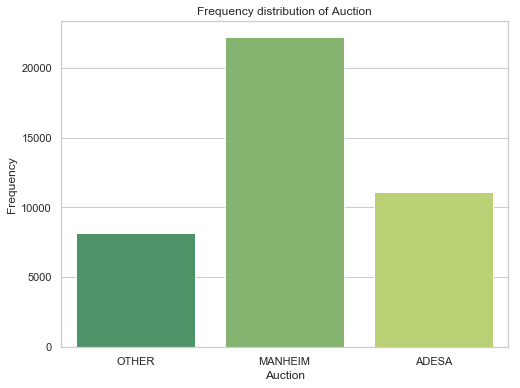

In [133]:
# Identify patterns using histogram
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Auction", data= X,palette="summer")
plt.ylabel('Frequency')
plt.xlabel('Auction')
plt.title('Frequency distribution of Auction')
plt.show()

In [134]:
# Figure 2 identifies that over half the used cars were being purchased from Manheim auction house, about a quarter of them were from Adesa auction house and the remaining used cars were purchased from other sources.

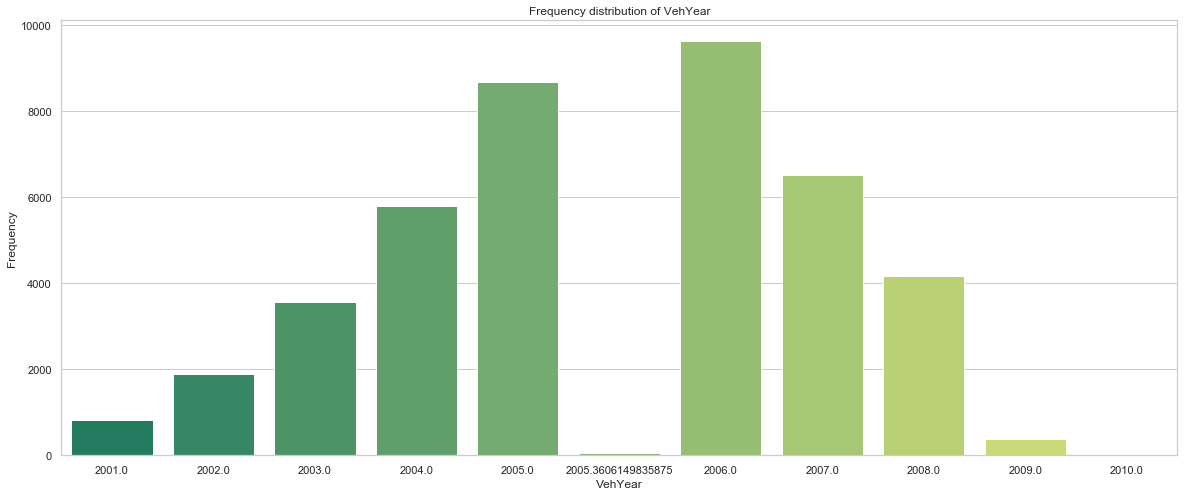

In [135]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="VehYear", data= X,palette="summer")
plt.ylabel('Frequency')
plt.xlabel('VehYear')
plt.title('Frequency distribution of VehYear')
plt.show()

In [136]:
#Year Vehicle is made ranging from 2001 to 2009, with 2005 to 2006 as majority.

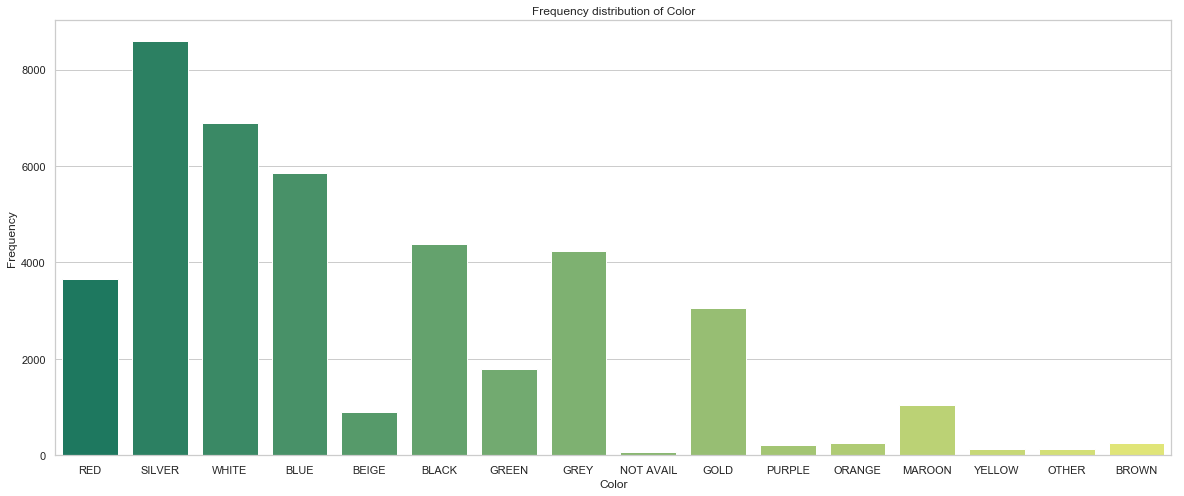

In [137]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="Color", data= X,palette="summer")
plt.ylabel('Frequency')
plt.xlabel('Color')
plt.title('Frequency distribution of Color')
plt.show()


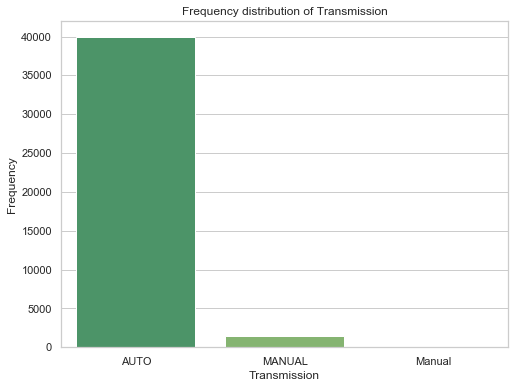

In [138]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Transmission", data= X,palette="summer")
plt.ylabel('Frequency')
plt.xlabel('Transmission')
plt.title('Frequency distribution of Transmission')
plt.show()

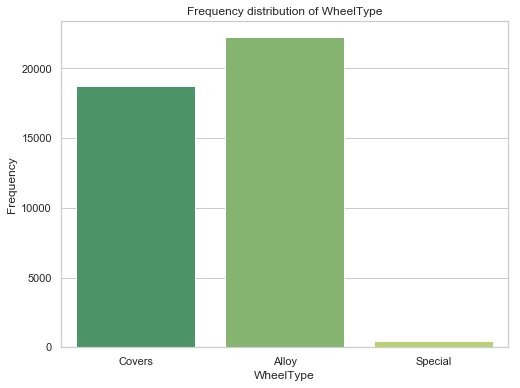

In [139]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="WheelType", data= X,palette="summer")
plt.ylabel('Frequency')
plt.xlabel('WheelType')
plt.title('Frequency distribution of WheelType')
plt.show()

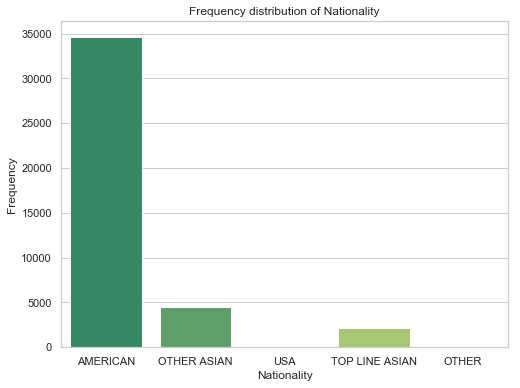

In [140]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Nationality", data= X,palette="summer")
plt.ylabel('Frequency')
plt.xlabel('Nationality')
plt.title('Frequency distribution of Nationality')
plt.show()

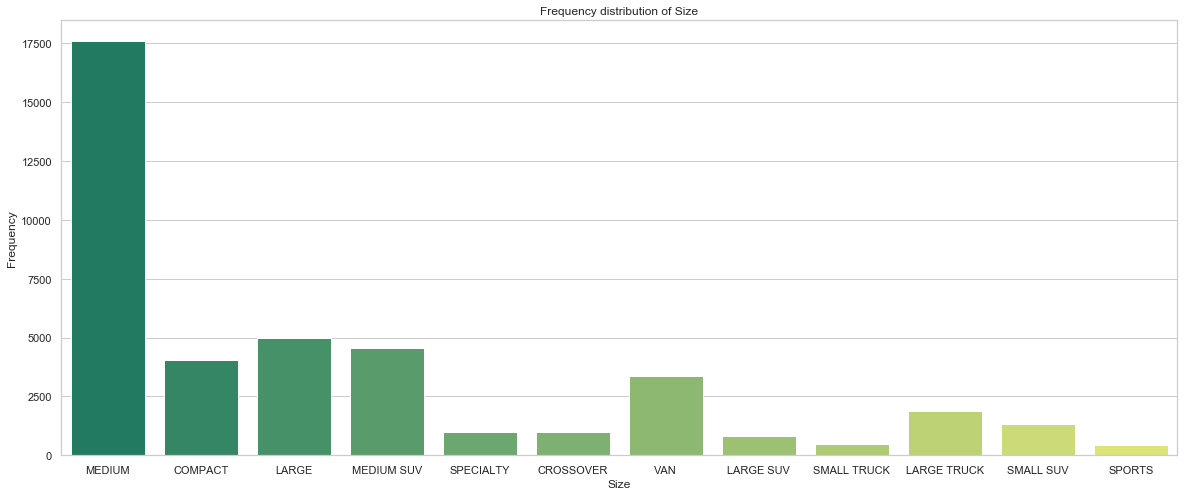

In [141]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x="Size", data= X,palette="summer")
plt.ylabel('Frequency')
plt.xlabel('Size')
plt.title('Frequency distribution of Size')
plt.show()

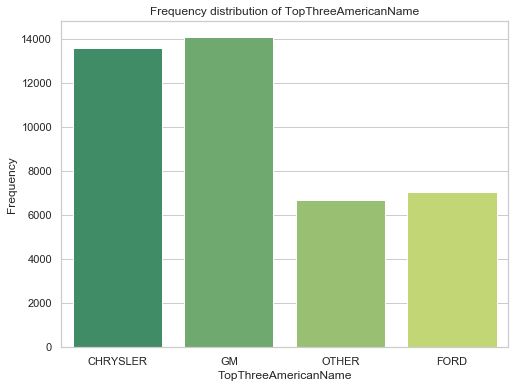

In [142]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="TopThreeAmericanName", data= X,palette="summer")
plt.ylabel('Frequency')
plt.xlabel('TopThreeAmericanName')
plt.title('Frequency distribution of TopThreeAmericanName')
plt.show()

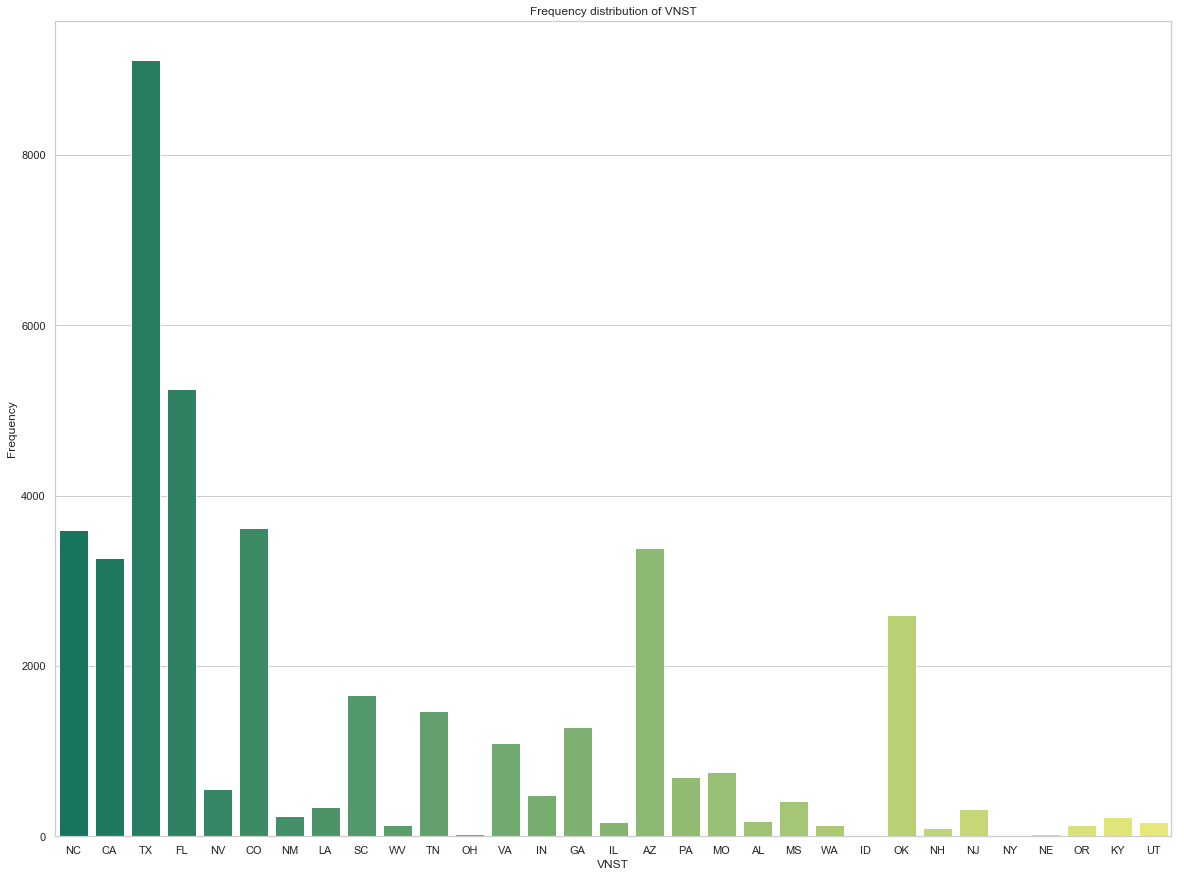

In [143]:
plt.figure(figsize=(20,15))
ax = sns.countplot(x="VNST", data= X,palette="summer")
plt.ylabel('Frequency')
plt.xlabel('VNST')
plt.title('Frequency distribution of VNST')
plt.show()

---

5. What distribution scheme did you use? what data partioning allocation did you set? Explain your selection

distribution scheme: Cross-Validation method. It can protext form overfitting errors. Ideally would like to use large data sets to evaluate trees. All the data have been used for training and testing. Cross-validation will use same data for learning and testing. 

data partitioning: 70% of the entire dataset for training, 15% of the entire dataset for validation and 15% of the entire dataset for testing.

In [144]:
# one hot encoding 
print("Before:", len(X.columns))
X = pd.get_dummies(X)

print("After:", len(X.columns))

Before: 26
After: 130


In [145]:
# Data partioning
from sklearn.model_selection import train_test_split

In [146]:
# Over sampling
from imblearn.over_sampling import RandomOverSampler
Ros = RandomOverSampler(random_state=0)

In [147]:
rs = 10

X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
X_resampled, y_resampled = Ros.fit_resample(X_train, y_train)

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Task 2. Predictive Modeling Using Decision Trees

1. Python: Build a decision tree using the default setting

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [149]:
# building a decision tree using the default setting
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

a. What is the classification accuracy on training and test datasets?

In [150]:
print("Train accuracy:", model.score(X_resampled, y_resampled))

Train accuracy: 0.9995845368575159


In [151]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.7900024109941333


In [152]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     10832
           1       0.21      0.23      0.22      1611

   micro avg       0.79      0.79      0.79     12443
   macro avg       0.55      0.55      0.55     12443
weighted avg       0.80      0.79      0.79     12443



In [153]:
# Feature importance

import numpy as np
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending ordera

indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 5 features, you can leave this out to print out everything
indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', importances[i])

VehBCost : 0.09049084676532015
VehOdo : 0.07938246601677017
MMRCurrentRetailRatio : 0.0757261376609308
PurchaseTimestamp : 0.07446810946102873
VehYear : 0.05699431466764884


In [154]:
#Visualising decision tree structure
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

In [155]:
# visualize
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("CaseStudy1_dt_viz.png")



b. What is the size of tree (I.e.number of nodes)

In [156]:
n_nodes = model.tree_.node_count
n_nodes

7653

c. How many leaves are in the tree that is selected based on the validation dataset?

In [157]:
print (len(set(model.apply(X_test))))


2334


d. which variable is used for the first split? what are the competing splits for the first split?



VehYears is used to split dataset into VehYear larger or smaller than 2004. The competing split is smaller than 2004.

e. What are the 5 important variables in building the tree?

VehBCost : 0.09049084676532015

VehOdo : 0.07938246601677017

MMRCurrentRetailRatio : 0.0757261376609308

PurchaseTimestamp : 0.07446810946102873

VehYear : 0.05699431466764884




f. Report if u see any evidence of model overfitting

Train accuracy: 0.9995845368575159,Test accuracy: 0.7900024109941333 

While the model performs well on the training dataset, it is unable to accurately predict data in the test set.

 g. Did changing the default setting (changing the number of splits) help improving the model?

In [158]:
#retrain with a small max_depth limit
depth=[2,3,4,5,6]
for i in depth: 
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_resampled, y_resampled)
    print("Max_depth: ",i)
    print("Train accuracy:", model.score(X_resampled, y_resampled))
    print("Test accuracy:", model.score(X_test, y_test))

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

Max_depth:  2
Train accuracy: 0.6017093340719345
Test accuracy: 0.5450454070561762
              precision    recall  f1-score   support

           0       0.92      0.53      0.67     10832
           1       0.18      0.68      0.28      1611

   micro avg       0.55      0.55      0.55     12443
   macro avg       0.55      0.60      0.47     12443
weighted avg       0.82      0.55      0.62     12443

Max_depth:  3
Train accuracy: 0.6297234202508606
Test accuracy: 0.5723700072329824
              precision    recall  f1-score   support

           0       0.93      0.55      0.69     10832
           1       0.19      0.71      0.30      1611

   micro avg       0.57      0.57      0.57     12443
   macro avg       0.56      0.63      0.50     12443
weighted avg       0.83      0.57      0.64     12443

Max_depth:  4
Train accuracy: 0.6335615083290468
Test accuracy: 0.5240697580969219
              precision    recall  f1-score   support

           0       0.93      0.49      0.6

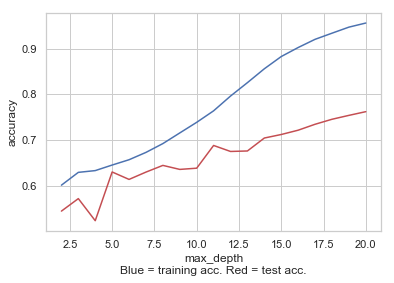

In [62]:
train_score = []
test_score = []

for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=10)
    model.fit(X_resampled, y_resampled)
    train_score.append(model.score(X_resampled,y_resampled))
    test_score.append(model.score(X_test,y_test))
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

In [159]:
model = DecisionTreeClassifier(max_depth=5, random_state=10)
model.fit(X_resampled, y_resampled)
print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))
y_pred2 = model.predict(X_test)
print(classification_report(y_test, y_pred2))

Train accuracy: 0.6457088592569145
Test accuracy: 0.630555332315358
              precision    recall  f1-score   support

           0       0.92      0.63      0.75     10832
           1       0.21      0.65      0.31      1611

   micro avg       0.63      0.63      0.63     12443
   macro avg       0.56      0.64      0.53     12443
weighted avg       0.83      0.63      0.69     12443



---

2. Python: Build another decision tree tuned with GridSearchCV

In [160]:
from sklearn.model_selection import GridSearchCV


In [161]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(20,100,10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.6564515490840027
Test accuracy: 0.6130354416137588
              precision    recall  f1-score   support

           0       0.92      0.61      0.73     10832
           1       0.20      0.64      0.30      1611

   micro avg       0.61      0.61      0.61     12443
   macro avg       0.56      0.62      0.52     12443
weighted avg       0.83      0.61      0.68     12443

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 90}


2.a. What is the classification accuracy?

In [162]:
print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))


Train accuracy: 0.6564515490840027
Test accuracy: 0.6130354416137588


2.b. What is the size of the tree
2.c. How many leaves are in the tree 

In [163]:
def print_tree_state(model,X_test):
    print("Depth of the tree: ",cv.best_estimator_.tree_.max_depth)
    print("Number of the nodes: ",cv.best_estimator_.tree_.node_count)
    print("Number of the leaves: ", len(set(cv.best_estimator_.apply(X_test))))
print_tree_state(cv.best_estimator_,X_test)

Depth of the tree:  6
Number of the nodes:  121
Number of the leaves:  61


d. Which variable is used for the first split? What are the competing splits for this first split?

In [164]:
# visualize
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dotfile = StringIO()
export_graphviz(cv.best_estimator_, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("optimal_tree.png")

VehYear <=2005.68 is used for the first split. The competing split for the first split is VehYear >2005.68.

e. What are the 5 important variables in building the tree?

In [165]:

# grab feature importances from the model and feature name from the original X
importances = cv.best_estimator_.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 5 features, you can leave this out to print out everything
indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', importances[i])

VehYear : 0.2977150623918622
VehBCost : 0.16951997029056035
WheelTypeID_1 : 0.13448364851134012
Auction_MANHEIM : 0.07509561546529316
PurchaseTimestamp : 0.05414322473937967


f. Report if you see any evidence of model overfitting?


Train accuracy: 0.6564515490840027 and Test accuracy: 0.6130354416137588 so the chances of model overfitting are very low.

g. What are the parameters used? 



Criterion, max_depth and min_samples_leaf.

# Task 3. Predictive modeling using regression

1. In preparation for regression, is any imputation of missing values needed for this data set? List the variables that needed this.

In [209]:
for i in X.columns:
    print(i)

PurchaseTimestamp
VehYear
VehOdo
MMRAcquisitionAuctionAveragePrice
MMRAcquisitionAuctionCleanPrice
MMRAcquisitionRetailAveragePrice
MMRAcquisitonRetailCleanPrice
MMRCurrentAuctionAveragePrice
MMRCurrentAuctionCleanPrice
MMRCurrentRetailAveragePrice
MMRCurrentRetailCleanPrice
MMRCurrentRetailRatio
VehBCost
WarrantyCost
Auction_ADESA
Auction_MANHEIM
Auction_OTHER
Make_ACURA
Make_BUICK
Make_CADILLAC
Make_CHEVROLET
Make_CHRYSLER
Make_DODGE
Make_FORD
Make_GMC
Make_HONDA
Make_HYUNDAI
Make_INFINITI
Make_ISUZU
Make_JEEP
Make_KIA
Make_LEXUS
Make_LINCOLN
Make_MAZDA
Make_MERCURY
Make_MINI
Make_MITSUBISHI
Make_NISSAN
Make_OLDSMOBILE
Make_PONTIAC
Make_SATURN
Make_SCION
Make_SUBARU
Make_SUZUKI
Make_TOYOTA
Make_VOLKSWAGEN
Make_VOLVO
Color_BEIGE
Color_BLACK
Color_BLUE
Color_BROWN
Color_GOLD
Color_GREEN
Color_GREY
Color_MAROON
Color_NOT AVAIL
Color_ORANGE
Color_OTHER
Color_PURPLE
Color_RED
Color_SILVER
Color_WHITE
Color_YELLOW
Transmission_AUTO
Transmission_MANUAL
Transmission_Manual
WheelTypeID_1
Whee

In [210]:
len(X.columns)

130

2. Apply transformation method(s) to the variable(s) that need it. List the variables that needed it

In [211]:
from sklearn.preprocessing import StandardScaler

In [218]:
columns_to_transform = Numer
df_log = X.copy()
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)

In [219]:
rs = 10
X_mat = X.as_matrix()
X_resampled, X_test, y_resampled, y_test = train_test_split(df_log.values, y, test_size=0.3,stratify=y, random_state=rs)

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


3. Build a regression model using the default regression method with all inputs. Once you done it, build another one and tune it using GridSearchCV. Answer the followings:

In [220]:
from sklearn.linear_model import LogisticRegression

In [221]:
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_resampled, y_resampled)


c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [222]:
# training and test accuracy
print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.8707333034822443
Test accuracy: 0.8705296150446034
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10832
           1       0.50      0.01      0.02      1611

   micro avg       0.87      0.87      0.87     12443
   macro avg       0.69      0.50      0.47     12443
weighted avg       0.82      0.87      0.81     12443



In [223]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

3.h. Name the regression function used.

Logistic regression

In [224]:

# grid search CV# grid  
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_resampled, y_resampled)

# test the best model
print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.8711121826886646
Test accuracy: 0.8706099815157117
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10832
           1       0.53      0.00      0.01      1611

   micro avg       0.87      0.87      0.87     12443
   macro avg       0.70      0.50      0.47     12443
weighted avg       0.83      0.87      0.81     12443

{'C': 0.1}


i. How much was the difference in performance of two models build, default and optimal?

In [225]:
print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 0.8707333034822443
Test accuracy: 0.8705296150446034


In [226]:
# test the best model
print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.8711121826886646
Test accuracy: 0.8706099815157117


j. Show the set parameters for the best model. What are the parameters used? Explain your decision. What are the optimal parameters?

C range from 10^(-6) to 10^(4), increasing in logarithmic order. Hyperparameter C is the parameter used to implement regularisation. GridSearchCV returns C = 0.1 as the optimal parameter.

k. Report which variables are included in the regression model.

In [227]:
for i in X.columns:
    print(i)

PurchaseTimestamp
VehYear
VehOdo
MMRAcquisitionAuctionAveragePrice
MMRAcquisitionAuctionCleanPrice
MMRAcquisitionRetailAveragePrice
MMRAcquisitonRetailCleanPrice
MMRCurrentAuctionAveragePrice
MMRCurrentAuctionCleanPrice
MMRCurrentRetailAveragePrice
MMRCurrentRetailCleanPrice
MMRCurrentRetailRatio
VehBCost
WarrantyCost
Auction_ADESA
Auction_MANHEIM
Auction_OTHER
Make_ACURA
Make_BUICK
Make_CADILLAC
Make_CHEVROLET
Make_CHRYSLER
Make_DODGE
Make_FORD
Make_GMC
Make_HONDA
Make_HYUNDAI
Make_INFINITI
Make_ISUZU
Make_JEEP
Make_KIA
Make_LEXUS
Make_LINCOLN
Make_MAZDA
Make_MERCURY
Make_MINI
Make_MITSUBISHI
Make_NISSAN
Make_OLDSMOBILE
Make_PONTIAC
Make_SATURN
Make_SCION
Make_SUBARU
Make_SUZUKI
Make_TOYOTA
Make_VOLKSWAGEN
Make_VOLVO
Color_BEIGE
Color_BLACK
Color_BLUE
Color_BROWN
Color_GOLD
Color_GREEN
Color_GREY
Color_MAROON
Color_NOT AVAIL
Color_ORANGE
Color_OTHER
Color_PURPLE
Color_RED
Color_SILVER
Color_WHITE
Color_YELLOW
Transmission_AUTO
Transmission_MANUAL
Transmission_Manual
WheelTypeID_1
Whee

l. Report the top-5 important variables (in the order) in the model.

In [228]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 5 features, you can leave this out to print out everything
indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', coef[i])

MMRAcquisitionAuctionAveragePrice : -1.8427569923940295
MMRAcquisitionRetailAveragePrice : 1.702006070760728
VehBCost : -1.4250620835075136
Color_NOT AVAIL : 1.1590895222006854
MMRCurrentRetailAveragePrice : -1.1292943775074766


In [244]:
importances = cv.best_estimator_.coef_[0]
   
indices = np.argsort(importances)
indices = np.flip(indices, axis = 0)
indices = indices[:5]

for i in indices:
    print(X.columns[i], ":", importances[i])

MMRAcquisitionRetailAveragePrice : 0.9416994292348291
Color_NOT AVAIL : 0.6528845249848749
Size_LARGE SUV : 0.6107435231115732
MMRAcquisitonRetailCleanPrice : 0.5749683817447335
VNST_PA : 0.4399714952396312


m. What is classification accuracy on training and test datasets?

In [232]:
print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 0.8707333034822443
Test accuracy: 0.8705296150446034


In [233]:
# test the best model
print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.8711121826886646
Test accuracy: 0.8706099815157117


n. Report any sign of overfitting.

There is a slightly overfitting because train accuracy is larger than test accuracy.

4. Build another regression model using the subset of inputs selected by RFE and selection by model method. Answer the followings:

In [234]:
from sklearn.feature_selection import RFECV

In [236]:
rfe = RFECV(estimator = LogisticRegression(random_state=10), cv=5)
rfe.fit(X_resampled,y_resampled)

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hejia\appdata\local\programs\python\python37\lib\si

RFECV(cv=5,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [238]:
# comparing how many variables before and after
print("Original feature set", X_resampled.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 130
Number of features after elimination 70


In [247]:
X_resampled_sel = rfe.transform(X_resampled)
X_test_sel = rfe.transform(X_test)

In [248]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_resampled_sel, y_resampled)

# test the best model
print("Train accuracy:", cv.score(X_resampled_sel, y_resampled))
print("Test accuracy:", cv.score(X_test_sel, y_test))

y_pred = cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.8710088519960045
Test accuracy: 0.8706099815157117
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10832
           1       0.53      0.00      0.01      1611

   micro avg       0.87      0.87      0.87     12443
   macro avg       0.70      0.50      0.47     12443
weighted avg       0.83      0.87      0.81     12443

{'C': 0.1}


In [ ]:
# running RFE + log transformation
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train_log, y_train_log) # run the RFECV on log transformed dataset

# comparing how many variables before and after
print("Original feature set", X_train_log.shape[1])
print("Number of features after elimination", rfe.n_features_)

# select features from log transformed dataset
X_train_sel_log = rfe.transform(X_train_log)
X_test_sel_log = rfe.transform(X_test_log)

# init grid search CV on transformed dataset
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_sel_log, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_log, y_test_log))

y_pred_log = cv.predict(X_test_sel_log)
print(classification_report(y_test_log, y_pred_log))

# print parameters of the best model
print(cv.best_params_)

Feature selection using another model

In [ ]:
fromfrom  sklearn.treesklearn.  import DecisionTreeClassifier

# similar parameters with the last practical
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print(cv.best_params_)

4.a. Report which variables are included in the regression model.

In [239]:
print("RFE Model Variables: ")
feature_list=[]
count=0
for i in range(len(X.columns)):
    if rfe.support_[i]==True:
        print(X.columns[i],':',rfe.estimator_.coef_[0][count])
        feature_list.append(X.columns[i])
        count+=1

RFE Model Variables: 
PurchaseTimestamp : 0.48447087504397046
VehOdo : 0.2176985525831304
MMRAcquisitionAuctionAveragePrice : -1.7911197983689078
MMRAcquisitionRetailAveragePrice : 1.6668061425443192
MMRAcquisitonRetailCleanPrice : 0.46218802539383097
MMRCurrentAuctionAveragePrice : 0.9511575862720612
MMRCurrentRetailAveragePrice : -1.1360260239729283
MMRCurrentRetailCleanPrice : -0.5210942609284347
MMRCurrentRetailRatio : -0.2589951875269146
VehBCost : -1.4253199662532947
WarrantyCost : 0.14581415153103222
Auction_ADESA : 0.2903528102506766
Auction_MANHEIM : -0.24664514415480498
Make_ACURA : 1.0553734198948328
Make_DODGE : -0.25436550311727096
Make_FORD : -0.2592904494658403
Make_GMC : -0.15864405794448871
Make_INFINITI : 0.6157512486262846
Make_ISUZU : -0.7556579111372466
Make_LEXUS : 0.40124356468585887
Make_LINCOLN : 0.504903936219084
Make_MAZDA : 0.2312990428127304
Make_MINI : 1.0520624341595577
Make_MITSUBISHI : -0.2497542445513661
Make_SATURN : 0.28774714323972844
Make_SCION : -

b. Report the top-5 important variables (in the order) in the model

---

# Task 4. Predictive Modeling Using Neural Networks

1. Build a Neural Network model using the default setting. Answer the following:

In [250]:
from sklearn.neural_network import MLPClassifier

In [251]:
model = MLPClassifier(random_state=rs)
model.fit(X_resampled, y_resampled)

print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

print(model)

c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train accuracy: 0.8800330658216512
Test accuracy: 0.8623322349915615
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     10832
           1       0.32      0.06      0.10      1611

   micro avg       0.86      0.86      0.86     12443
   macro avg       0.60      0.52      0.51     12443
weighted avg       0.80      0.86      0.82     12443

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


4.a. What is the network architecture?

Input layer, hidden layers, output

b. How many iterations are needed to train this network?

In [252]:
#Iteration
print("Iterations : ", model.n_iter_)

Iterations :  200


c. Do you see any sign of over-fitting?/e. What is classification accuracy on training and test datasets?

Train accuracy > Test accuracy

Train accuracy: 0.8800330658216512
Test accuracy: 0.8623322349915615

d. Did the training process converge and resulted in the best model? 

---

2. Python: Refine this network by tuning it with GridSearchCV. 

In [254]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=10), cv=5, n_jobs=-1)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test,y_test))

predict = cv.predict(X_test)
print(classification_report(y_test, predict))

print(cv.best_params_)

Train accuracy: 0.8704921985327042
Test accuracy: 0.8705296150446034
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10832
           1       0.00      0.00      0.00      1611

   micro avg       0.87      0.87      0.87     12443
   macro avg       0.44      0.50      0.47     12443
weighted avg       0.76      0.87      0.81     12443

{'alpha': 0.01, 'hidden_layer_sizes': (9,)}


c:\users\hejia\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


a. What is the network architecture?

Input layer, hidden layers, output

b. How many iterations are needed to train this network?

In [255]:
#Iteration
print("Iterations : ", cv.best_estimator_.n_iter_)

Iterations :  103


c. Sign of overfitting?

No, because train accuracy is slightly smaller than test accuracy.

d. Did the training process converge and resulted in the best model? 

Yea, because the overall accuracy has improved.

e. What is classification accuracy on training and test datasets? Is there any improvement in the outcome?

In [256]:
print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test,y_test))

Train accuracy: 0.8704921985327042
Test accuracy: 0.8705296150446034


3. Would feature selection help here? 

SyntaxError: invalid syntax (<ipython-input-257-731313f61e40>, line 1)